In [2]:
import numpy as np

import jax
import jax.numpy as jnp
from jax import grad, random, vmap
import optax

import matplotlib.pyplot as plt

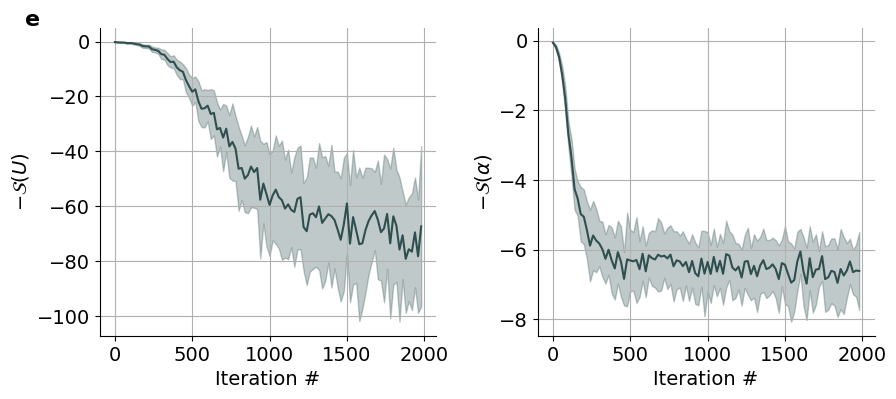

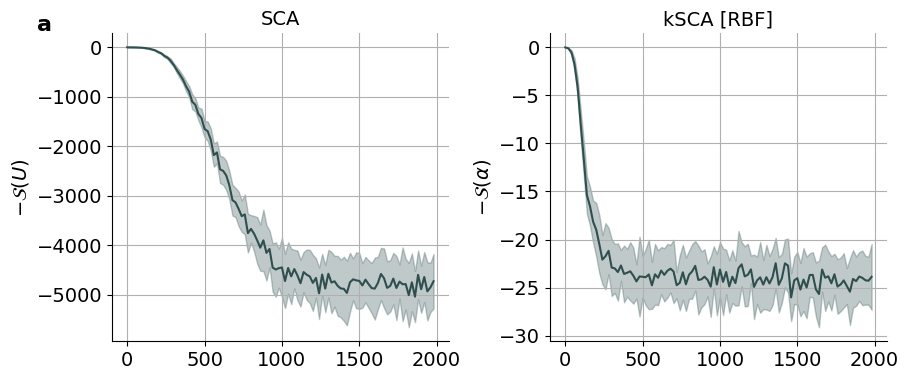

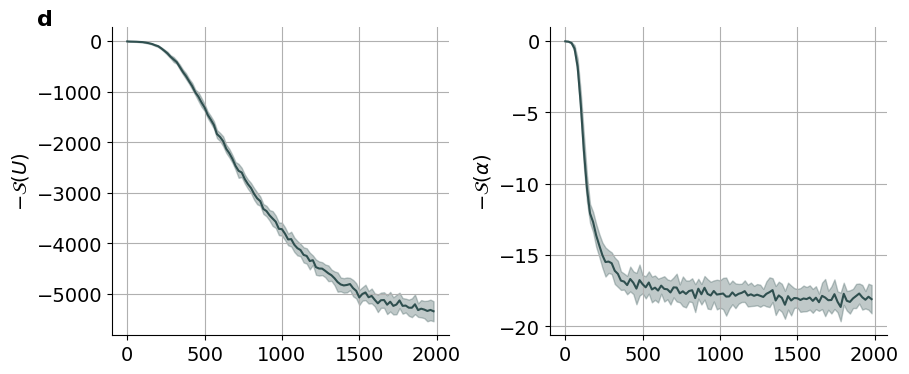

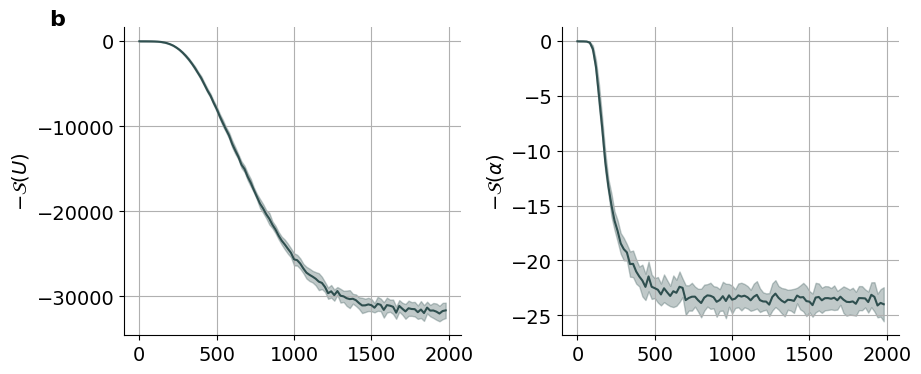

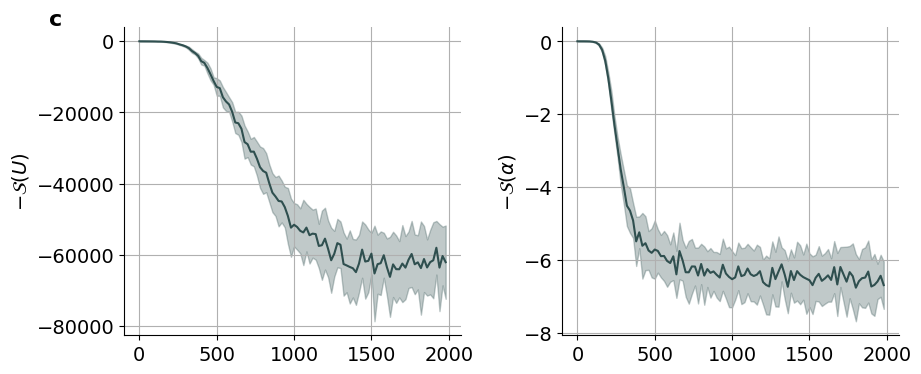

In [40]:

main_path = '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy_datasets/toy_data_'

SCA_infty = f'{main_path}/infty/linear/ls_loss_sigma0.75_l20.1.npy'

kSCA_SE_infty = f'{main_path}/infty/gaussian/ls_loss_sigma0.75_l20.1.npy'

SCA_rotation = f'{main_path}/rotation/linear/ls_loss_sigma1.0_l20.1.npy'

kSCA_SE_rotation =  f'{main_path}/rotation/gaussian/ls_loss_sigma1.0_l20.1.npy'

SCA_particle = f'{main_path}/particle/linear/ls_loss_sigma1.25_l20.1.npy'


kSCA_SE_particle = f'{main_path}/particle/gaussian/ls_loss_sigma1.25_l20.1.npy'

SCA_vdp = f'{main_path}/vdp/linear/ls_loss_sigma2.0_l20.1.npy'
  

kSCA_SE_vdp = f'{main_path}/vdp/gaussian/ls_loss_sigma2.0_l20.1.npy'

SCA_duffing = f'{main_path}/duffing/linear/ls_loss_sigma3.0_l20.1.npy'

kSCA_SE_duffing = f'{main_path}/duffing/gaussian/ls_loss_sigma3.0_l20.1.npy'

def plot_loss(ax, loss, fontsize=14, num_elements = 20, sca=True, id='', title=False, ylabel=False): 
    loss = np.load(loss)    
    steps = list(range(0, len(loss), num_elements))
    mean_loss = np.array([np.mean(loss[i:i+num_elements]) for i in range(0, len(loss ), num_elements)])
    std_loss = np.array([np.std(loss[i:i+num_elements]) for i in range(0, len(loss), num_elements)])
    ax.plot(steps, mean_loss, linestyle='-', color='darkslategrey')
    ax.fill_between(steps, mean_loss - std_loss, mean_loss + std_loss, color='darkslategrey', alpha=0.3)
    if sca:
        ax.set_ylabel(r"$-\mathcal{S}(U)$", fontsize=fontsize)
        if title:
            ax.set_title('SCA', fontsize=fontsize)
    else:
        ax.set_ylabel(r"$-\mathcal{S}(\alpha)$", fontsize=fontsize)
        if title:
            ax.set_title('kSCA [RBF]', fontsize=fontsize)
    if ylabel:
        ax.set_xlabel('Iteration #', fontsize=fontsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid()
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    fig.text(0.05, 0.9, id, va='center', rotation='horizontal', fontsize=fontsize+2, fontweight='bold')

wspace=0.3
fig, axs = plt.subplots(1, 2, figsize=(10,4))
plot_loss(axs[0], SCA_infty, num_elements = 20, sca=True, id='e', ylabel=True)
plot_loss(axs[1], kSCA_SE_infty, num_elements = 20, sca=False, ylabel=True)
plt.subplots_adjust(wspace=wspace)

fig, axs = plt.subplots(1,2, figsize=(10,4))
plot_loss(axs[0], SCA_rotation, num_elements = 20, sca=True, id='a', title=True)
plot_loss(axs[1], kSCA_SE_rotation, num_elements = 20, sca=False, title=True)
plt.subplots_adjust(wspace=wspace)

fig, axs = plt.subplots(1,2, figsize=(10,4))
plot_loss(axs[0], SCA_particle, num_elements = 20, sca=True, id='d')
plot_loss(axs[1], kSCA_SE_particle, num_elements = 20, sca=False)
plt.subplots_adjust(wspace=wspace)

fig, axs = plt.subplots(1,2, figsize=(10,4))
plot_loss(axs[0], SCA_vdp, num_elements = 20, sca=True, id='b')
plot_loss(axs[1], kSCA_SE_vdp, num_elements = 20, sca=False)
plt.subplots_adjust(wspace=wspace)

fig, axs = plt.subplots(1,2, figsize=(10,4))
plot_loss(axs[0], SCA_duffing, num_elements = 20, sca=True, id='c')
plot_loss(axs[1], kSCA_SE_duffing, num_elements = 20, sca=False)
plt.subplots_adjust(wspace=wspace)